# G02 Bar, line, histogram, box, KDE

## Mục đích

Trong bài này, chúng ta sẽ tìm hiểu cách vẽ một số loại biểu đồ đơn giản để mô tả phân bố của một biến.


## Bar chart

Biểu đồ cột hoặc thanh (bar) thường sử dụng để thể hiện số lượng của các nhóm danh mục (ví dụ, bao nhiêu người thừa cân / thiếu cân, bao nhiêu người hài lòng / không hài lòng với dịch vụ).

Số liệu cung cấp cho Pyplot để vẽ bar chart là số liệu đã tổng hợp. Xem ví dụ dưới đây về số lượng bệnh nhân viêm thực quản trào ngược theo các mức độ nặng theo phân loại Los-Angeles.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sex_dict = {0: "Nữ", 1: "Nam"}
eso_vtq_dict = {0: "Không VTQ", 1: "VTQ LA A", 2: "VTQ LA B", 3: "VTQ LA C"}

d = pd.read_excel("../04_data/hrm.xlsx") \
    .replace({
        "sex": sex_dict,
        "eso_LA": eso_vtq_dict
    }) \
    .assign(
        tuoi = lambda x: x["date_exam"].dt.year - x["yob"]
    )

d_agg_vtq = d["eso_LA"].value_counts().reset_index()
d_agg_vtq.columns = ["vtq", "count"]
d_agg_vtq

,vtq,count
0,Không VTQ,192
1,VTQ LA A,100
2,VTQ LA B,10
3,VTQ LA C,3


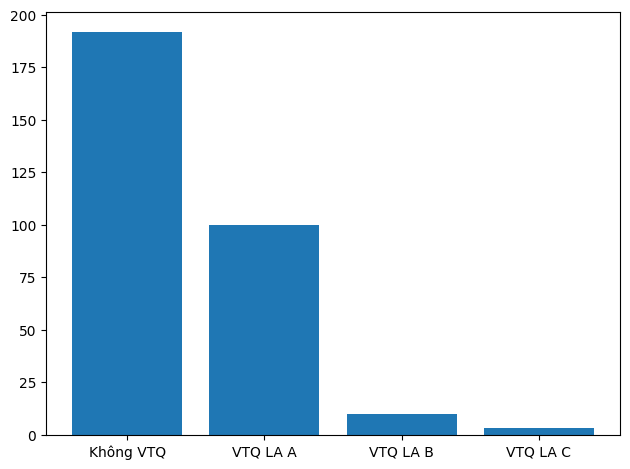

In [2]:
fig, ax = plt.subplots(tight_layout=True)
ax.bar(d_agg_vtq["vtq"], d_agg_vtq["count"])
plt.show()

Mặc định, độ rộng của một cột sẽ chiếm 80% bề rộng dành cho mỗi danh mục. Bạn có thể thay đổi thiết lập này bằng đối số `width`.

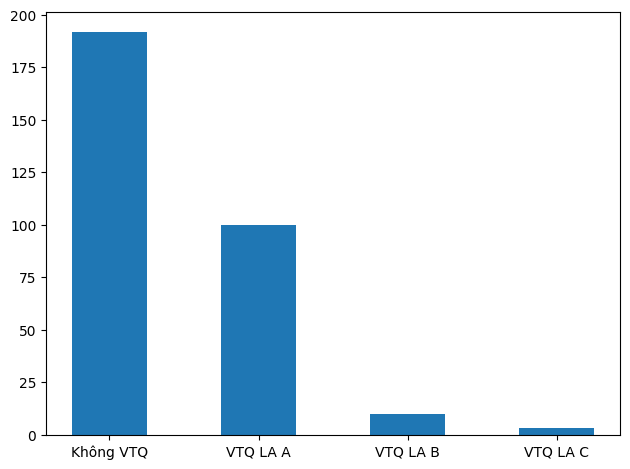

In [3]:
fig, ax = plt.subplots(tight_layout=True)
ax.bar(d_agg_vtq["vtq"], d_agg_vtq["count"], width=0.5)
plt.show()

Trong một số trường hợp, bạn muốn mép các cột bắt đầu từ vạch kẻ của trục x (x ticks) thay vì căn giữa. Bạn có thể thay đổi đối số `align` cho việc này.

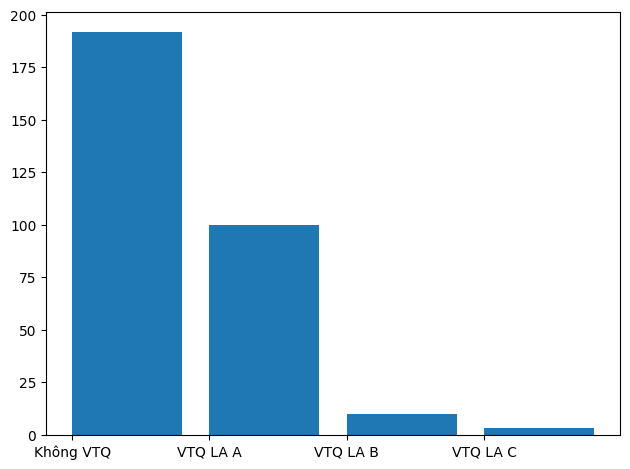

In [4]:
fig, ax = plt.subplots(tight_layout=True)
ax.bar(d_agg_vtq["vtq"], d_agg_vtq["count"], align="edge")
plt.show()

Nếu muốn vẽ biểu đồ dạng thanh nằm ngang thay vì nằm dọc như trên, chúng ta sẽ dùng hàm `barh()`.

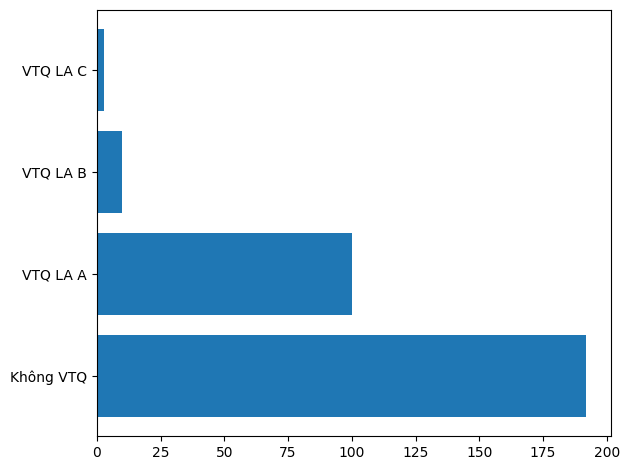

In [5]:
fig, ax = plt.subplots(tight_layout=True)
ax.barh(d_agg_vtq["vtq"], d_agg_vtq["count"])
plt.show()

Một vấn đề nho nhỏ của biểu đồ nằm ngang là nhóm xuất hiện đầu tiên trong bảng tổng hợp (trong ví dụ này là "Không VTQ") sẽ nằm ở dưới cùng. Tuy nhiên, theo trật tự thị giác, chúng ta thường nhìn từ trên xuống. Thay vì việc sắp xếp lại các nhóm này, chúng ta có thể đảo ngược (invert) trục y.

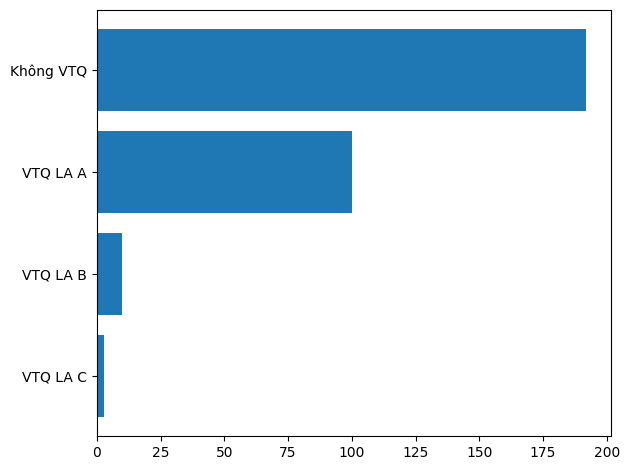

In [6]:
fig, ax = plt.subplots(tight_layout=True)
ax.barh(d_agg_vtq["vtq"], d_agg_vtq["count"])
ax.invert_yaxis()
plt.show()

## Line chart

Mặc dù line chart và bar chart đều hiển thị các giá trị của các nhóm, bar chart thường dùng để thể hiện nhóm nào chiếm tỉ lệ cao nhất / thấp nhất, còn line chart thường cho thấy xu hướng. Do đó, line chart thường dành để biểu diễn thay đổi qua thời gian hoặc theo một thứ tự nào đó (ví dụ, thay đổi theo nồng độ phơi nhiễm độc chất). Trong ví dụ dưới đây, chúng ta thể hiện thay đổi theo tuổi của IRP4s.

In [7]:
d_agg_irp4s = d.groupby("tuoi")["les_irp4s"].mean().reset_index()
d_agg_irp4s.head()

,tuoi,les_irp4s
0,20,2.5
1,21,3.5
2,23,6.0
3,24,7.3
4,25,7.8


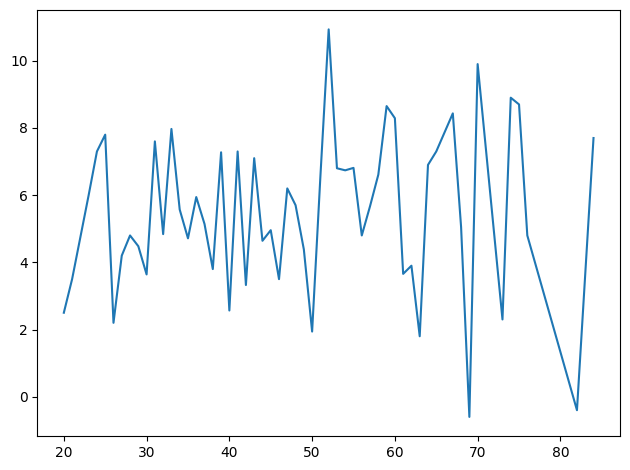

In [8]:
fig, ax = plt.subplots(tight_layout=True)
ax.plot(d_agg_irp4s["tuoi"], d_agg_irp4s["les_irp4s"])
plt.show()

## Histogram

Để mô tả phân bố của biến liên tục, chúng ta thường sử dụng histogram. Nếu bạn chưa biết histogram làm gì, thì nó là một biểu đồ cột mô tả mật độ xuất hiện của các giá trị trong từng khoảng giá trị (gọi là bins). Bạn có thể quy định số lượng bins được sử dụng để mô tả phân bố của biến liên tục, hoặc để máy tính tự tính toán. Các bins luôn có độ rộng bằng nhau.

Histogram dưới đây thể hiện phân bố của áp lực khi nghỉ của cơ thắt thực quản dưới.

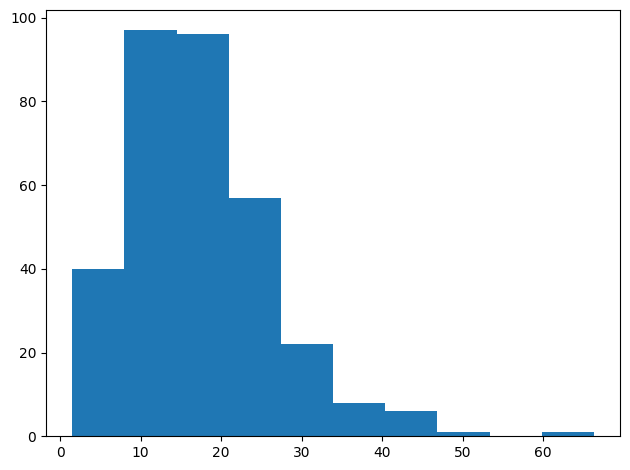

In [9]:
fig, ax = plt.subplots(tight_layout=True)
ax.hist(d["les_baserestp"])
plt.show()

Hãy xem biểu đồ sẽ thay đổi như thế nào khi chúng ta thay đổi số bins.

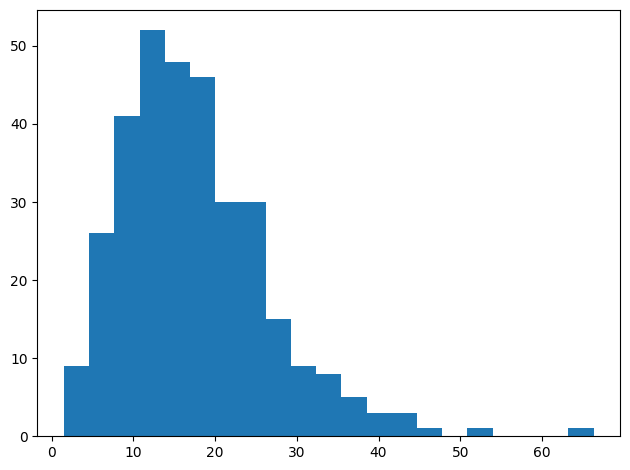

In [10]:
fig, ax = plt.subplots(tight_layout=True)
ax.hist(d["les_baserestp"], bins=21)
plt.show()

Bạn có thể vẽ nhiều histogram của nhiều biến liên tục bằng việc cung cấp một danh sách các giá trị của các biến này. Thường chúng ta sẽ thêm nhãn (label) để phân biệt giữa các biến liên tục này. Để hiển thị chú thích cho các nhãn này, chúng ta sẽ dùng hàm `legend()`.

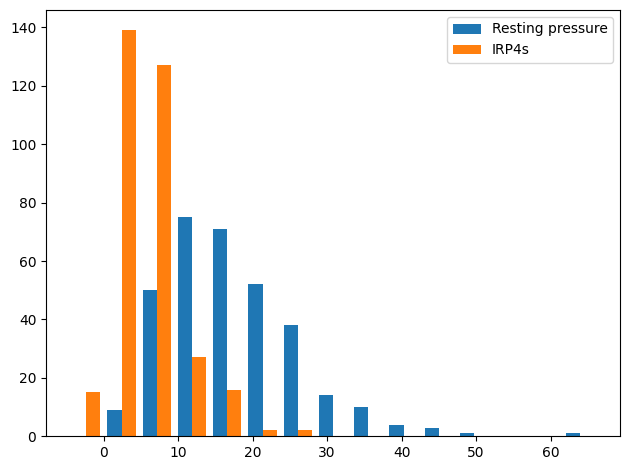

In [11]:
fig, ax = plt.subplots(tight_layout=True)
ax.hist([d["les_baserestp"], d["les_irp4s"]], bins=15,
    label=["Resting pressure", "IRP4s"])
ax.legend()
plt.show()

## Box plot

Mặc dù histogram mô tả chi tiết phân bố của biến liên tục, chúng ta lại không quan sát được một số đặc điểm phân bố như median, Q1, Q3, và phát hiện các giá trị ngoại vị (outlier). Box plot sẽ hữu dụng trong tình huống này.

Để vẽ box plot, bạn sẽ dùng hàm `boxplot()`. Lưu ý rằng hàm sẽ không vẽ nếu như trong giá trị của bạn có NA; do đó, nhớ loại bỏ các giá trị NA trước khi vẽ.

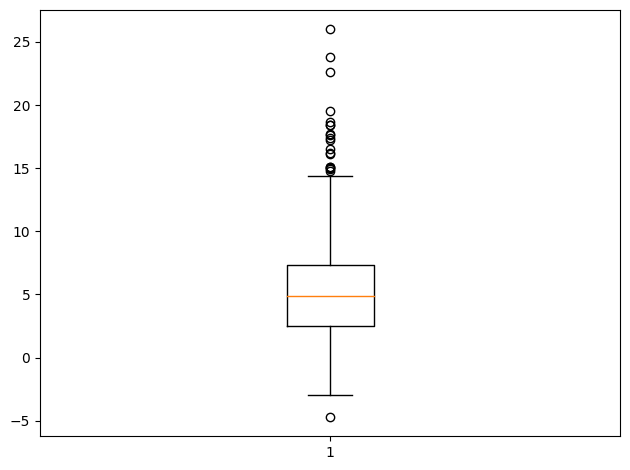

In [12]:
fig, ax = plt.subplots(tight_layout=True)
ax.boxplot(d["les_irp4s"].dropna())
plt.show()

Chúng ta thường vẽ nhiều box plot để so sánh giữa các nhóm. Tương tự như histogram ở trên, bạn cần cung cấp một danh sách các giá trị của mỗi nhóm. Có nhiều cách để tạo ra danh sách các giá trị này, bạn có thể tự nghĩ ra cách riêng cho bản thân. Dưới đây là gợi ý của mình.

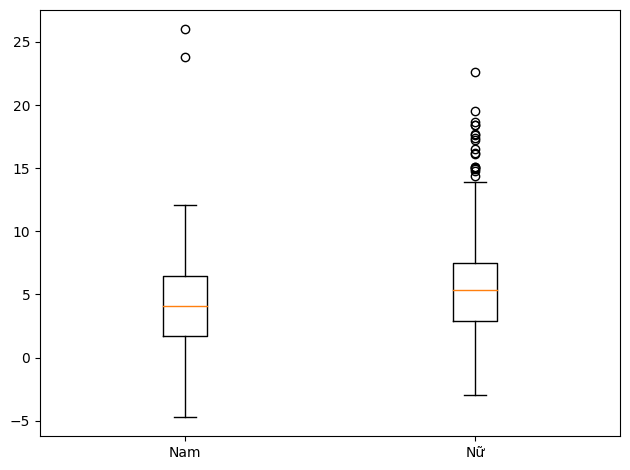

In [13]:
# Tạo dictionary để giữ lại labels
d_grpby = d.groupby("sex")
d_by_sex = {group: d_grpby.get_group(group)["les_irp4s"].dropna() for group in d_grpby.groups}

fig, ax = plt.subplots(tight_layout=True)
ax.boxplot(d_by_sex.values(), labels=d_by_sex.keys())
plt.show()

Bạn có thể vẽ tất cả các biểu đồ trên đây bằng hàm [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) trong Pandas.

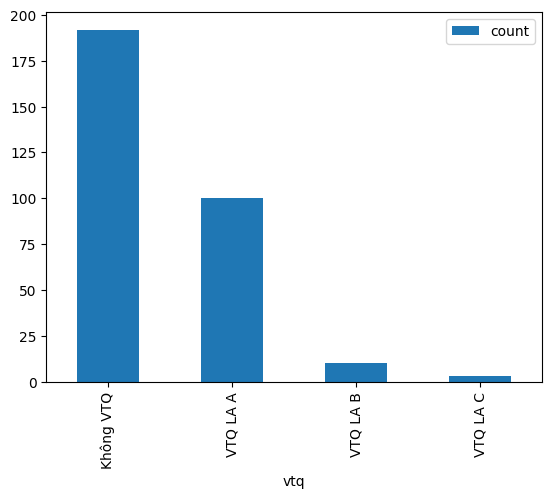

In [14]:
d_agg_vtq.plot(x="vtq", y="count", kind="bar")
plt.show()

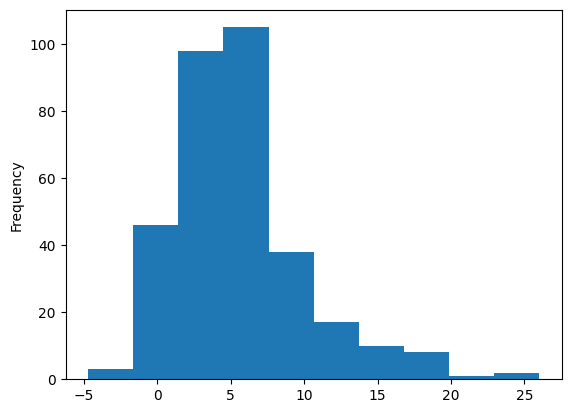

In [15]:
d["les_irp4s"].plot(kind="hist")
plt.show()

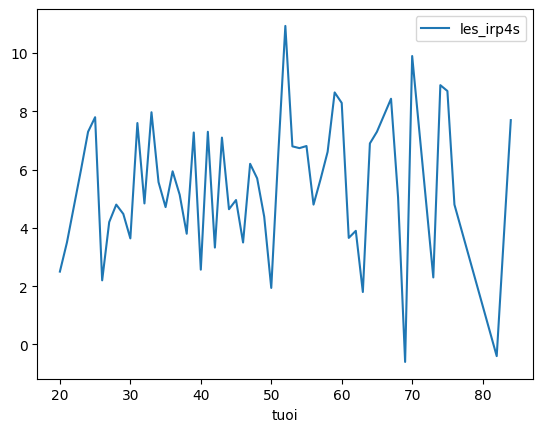

In [16]:
d_agg_irp4s.plot(x="tuoi", y="les_irp4s", kind="line")
plt.show()

## KDE

Thay vì hiển thị phân bố của biến liên tục bằng histogram, bạn có thể sử dụng kernel density estimate (KDE) plot. Đây là một thuật toán cao cấp sử dụng số liệu quan sát được để vẽ ra một đường cong mềm mại (smooth) mô tả phân bố của biến. Pyplot không hỗ trợ KDE, nhưng bạn có thể vẽ bằng Pandas.

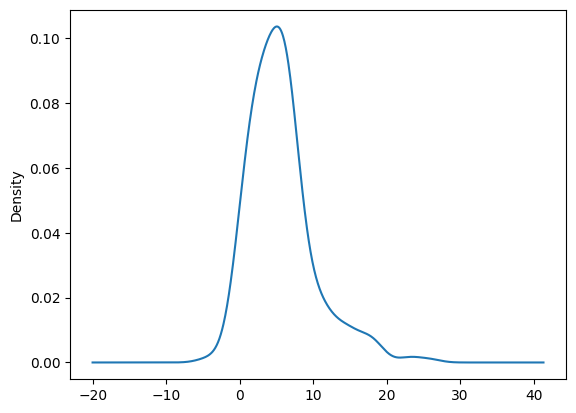

In [17]:
d["les_irp4s"].plot(kind="kde")
plt.show()

Hoặc chúng ta có thể sử dụng thư viện Seaborn.

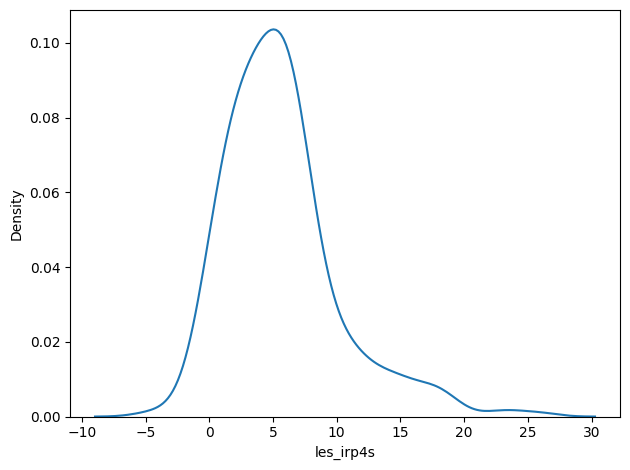

In [18]:
import seaborn as sns

fig, ax = plt.subplots(tight_layout=True)
sns.kdeplot(data=d, x="les_irp4s", ax=ax)
plt.show()

---

[Bài trước](./01_intro.ipynb) - [Danh sách bài](../README.md) - [Bài sau](./03_plot.ipynb)